In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

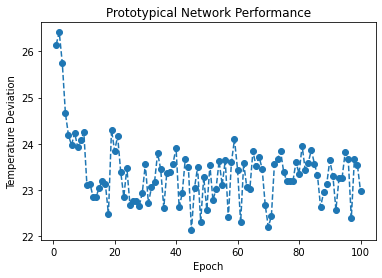

In [2]:
accuracies = []
read = False
acc_pattern = re.compile(r'Validation')
file = open('./Prototypical_Network/history.out', 'r')
lines = file.readlines()
for line in lines:
    if read:
        acc = float(line[-8:])
        accuracies.append(acc)
        read = False
    else:
        res = re.search(acc_pattern, line)
        if res != None:
            read = True

x = np.linspace(1, len(accuracies), num=len(accuracies))
plt.plot(x, np.array(accuracies), '--o')
plt.title('Prototypical Network Performance')
plt.xlabel('Epoch')
plt.ylabel('Temperature Deviation')
#plt.savefig('Prototypical Network Performance.pdf')
plt.show()

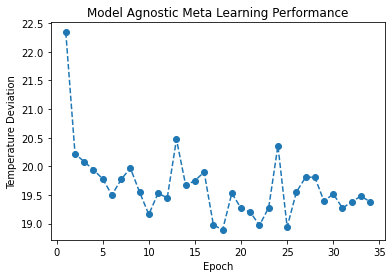

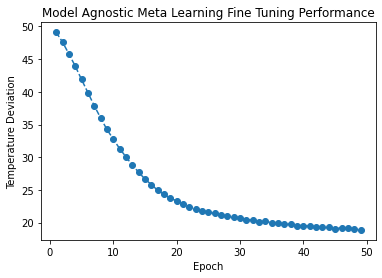

In [4]:
accuracies = []
test_losses = []
min_test_loss = 1000
episode_losses = np.zeros(0)
read = False
acc_pattern = re.compile(r'Test loss')
num_pattern = re.compile(r'\d*\.\d*')
end_pattern = re.compile(r'\]')
file = open('./MAML/history.out', 'r')
lines = file.readlines()
for line in lines:
    res = re.search(acc_pattern, line)
    if res != None:
        read = True
    if read:
        res = num_pattern.findall(line)
        res = np.array([float(loss) for loss in res])
        episode_losses = np.concatenate((episode_losses, res))
        res = re.search(end_pattern, line)
        if res != None:
            read = False
            episode_loss = episode_losses.min()
            test_losses.append(episode_loss)
            if episode_loss < min_test_loss:
                min_test_loss = episode_losses.min()
                min_episode_losses = episode_losses
            episode_losses =  np.zeros(0)

        

x = np.linspace(1, len(test_losses), num=len(test_losses))
plt.plot(x, np.array(test_losses), '--o')
plt.title('Model Agnostic Meta Learning Performance')
plt.xlabel('Epoch')
plt.ylabel('Temperature Deviation')
#plt.savefig('Model Agnostic Meta Learning Performance.pdf')
plt.show()

x = np.linspace(1, len(min_episode_losses), num=len(min_episode_losses))
plt.plot(x, min_episode_losses, '--o')
plt.title('Model Agnostic Meta Learning Fine Tuning Performance')
plt.xlabel('Epoch')
plt.ylabel('Temperature Deviation')
#plt.savefig('Model Agnostic Meta Learning Fine Tuning Performance.pdf')
plt.show()